In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from data_handler import DataHandler, ScatterDataHandler, BroadcastDataHandler, LatencyDataHandler
import os

## Data loading

In [17]:
dhs = dict()
DATA_PATH = '../output_data'
operations = ('latency', 'scatter', 'broadcast')
        
for operation in operations:
    dhs[operation] = []
    for file in os.listdir(f'{DATA_PATH}/{operation}'):
        if file.endswith('.csv'):
            file_path = f'{DATA_PATH}/{operation}/{file}'
            if operation == 'scatter':
                obj = ScatterDataHandler(file_path)
            elif operation == 'broadcast':
                obj = BroadcastDataHandler(file_path)
            elif operation == 'latency':
                obj = LatencyDataHandler(file_path)
            dhs[operation].append(obj)

## Latency

In order to have a baseline model to compare with, we will use the `osu_latency` benchmark from the `osu-micro-benchmarks` suite. This benchmark measures the latency of a message exchange between two MPI processes. For this test we will use two different partitions: THIN and EPYC. This way we can compare the two architectures.

The tests are:
- **intra socket (EPYC)**:
  - `0:0`
  - ...
  - `0:127`
- **intra socket (THIN)**:
  - `0:0`
  - ...
  - `0:11`
- **intra node (THIN)**:
  - `00:10`
  - `00:13`
  - `00:16`
  - `00:1{10}`
- **intra cluster (THIN)**:
  - `000:100`
  - `000:110`
  - `010:100`

## Intra-Socket

In [ ]:
latencies = [ dh for dh in dhs['latency'] if dh.entity == 'socket' ]
print(f'Number of measurements: {len(latencies)}')

In [ ]:
df_latencies = [ dh.data['Avg Latency (us)'] for dh in latencies ]
df_latency = pd.DataFrame(df_latencies).T
df_latency.columns = [f'0-{i}' for i in range(len(df_latencies))]

df_latency.head()

In [ ]:
sizes = (2, 1024, 1024*1024)
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle('Latency for different message sizes')

y_new_arr = []

for i, size in enumerate(sizes):
    x = np.arange(len(df_latencies))
    y_arr = np.array([ df_latency[f'0-{i}'][size] for i in range(len(df_latencies)) ])
    y_mean = np.mean(y_arr[1:])
    ax[i].plot(x[1:], y_arr[1:], label='Latency')
    ax[i].plot(x[1:], [y_mean] * len(x[1:]), label='Mean', linestyle='--')
    ax[i].set_title(f'Latency for {size} bytes')
    ax[i].set_xlabel('Second core')
    ax[i].set_ylabel('Latency (us)')
    ax[i].legend()
plt.show()

#### Latency between 0 and 1 all message sizes

In [ ]:
from sklearn import linear_model

y = df_latency['0-1'].values
x = df_latency.index.values.reshape(-1, 1)

linreg = linear_model.LinearRegression()
linreg.fit(x, y)
y_pred = linreg.predict(x)

slope, intercept = linreg.coef_[0] * 1e6, linreg.intercept_
print(f'Slope: {slope:.2f} us/byte')
print(f'Intercept: {intercept:.2f} us')

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
ax.plot(x, y, label='Latency')
ax.plot(x, y_pred, label='Linear regression', linestyle='--')
ax.set_title('Latency between cores 0 and 1')
ax.set_xlabel('Second core')
ax.set_ylabel('Latency (us)')
ax.legend()
ax.grid()
plt.show()

### Intra Node

In [ ]:
latencies = [ dh for dh in dhs['latency'] if dh.entity == 'node' ]
print(f'Number of measurements: {len(latencies)}')

In [ ]:
df_latencies = [ dh.data['Avg Latency (us)'] for dh in latencies ]
df_latency = pd.DataFrame(df_latencies).T
df_latency.columns = [f'0-{i}' for i in range(len(df_latencies))]

df_latency.head()

In [ ]:
sizes = (2, 1024, 1024*1024)
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle('Latency for different message sizes')

y_new_arr = []

for i, size in enumerate(sizes):
    x = np.arange(len(df_latencies))
    y_arr = np.array([ df_latency[f'0-{i}'][size] for i in range(len(df_latencies)) ])
    y_mean = np.mean(y_arr)
    ax[i].plot(x, y_arr, label='Latency')
    ax[i].plot(x, [y_mean] * len(x), label='Mean', linestyle='--')
    ax[i].set_title(f'Latency for {size} bytes')
    ax[i].set_xlabel('Second core')
    ax[i].set_ylabel('Latency (us)')
    ax[i].legend()
plt.show()

In [ ]:
y = df_latency['0-1'].values
x = df_latency.index.values.reshape(-1, 1)

linreg = linear_model.LinearRegression()
linreg.fit(x, y)
y_pred = linreg.predict(x)

slope, intercept = linreg.coef_[0] * 1e6, linreg.intercept_
print(f'Slope: {slope:.2f} us/byte')
print(f'Intercept: {intercept:.2f} us')

fig, ax = plt.subplots(1, 1, figsize=(10, 5))
ax.plot(x, y, label='Latency')
ax.plot(x, y_pred, label='Linear regression', linestyle='--')
ax.set_title('Latency between cores 0 and 1')
ax.set_xlabel('Second core')
ax.set_ylabel('Latency (us)')
ax.legend()
ax.grid()
plt.show()

### Intra Cluster

In [ ]:
latencies = [ dh for dh in dhs['latency'] if dh.entity == 'cluster' ]
print(f'Number of measurements: {len(latencies)}')

In [ ]:
df_latencies = [ dh.data['Avg Latency (us)'] for dh in latencies ]
df_latency = pd.DataFrame(df_latencies).T
df_latency.columns = [f'0-{i}' for i in range(len(df_latencies))]

df_latency.head()

In [ ]:
sizes = (2, 1024, 1024*1024)
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle('Latency for different message sizes')

y_new_arr = []

for i, size in enumerate(sizes):
    x = np.arange(len(df_latencies))
    y_arr = np.array([ df_latency[f'0-{i}'][size] for i in range(len(df_latencies)) ])
    y_mean = np.mean(y_arr)
    ax[i].plot(x, y_arr, label='Latency')
    ax[i].plot(x, [y_mean] * len(x), label='Mean', linestyle='--')
    ax[i].set_title(f'Latency for {size} bytes')
    ax[i].set_xlabel('Second core')
    ax[i].set_ylabel('Latency (us)')
    ax[i].legend()
plt.show()

In [ ]:
y = df_latency['0-1'].values
x = df_latency.index.values.reshape(-1, 1)

linreg = linear_model.LinearRegression()
linreg.fit(x, y)
y_pred = linreg.predict(x)

slope, intercept = linreg.coef_[0] * 1e6, linreg.intercept_
print(f'Slope: {slope:.2f} us/byte')
print(f'Intercept: {intercept:.2f} us')

fig, ax = plt.subplots(1, 1, figsize=(10, 5))
ax.plot(x, y, label='Latency')
ax.plot(x, y_pred, label='Linear regression', linestyle='--')
ax.set_title('Latency between cores 0 and 1')
ax.set_xlabel('Second core')
ax.set_ylabel('Latency (us)')
ax.legend()
ax.grid()
plt.show()

## Broadcast

We will do three plots one for each implementation of the broadcast algorithm:
1. Basic linear
2. Chain
5. Binary tree
6. Binomial

In [14]:
latencies = [ dh for dh in dhs['broadcast'] if dh.entity == 'core' ]
print(f'Number of measurements: {len(latencies)}')

Number of measurements: 96


In [ ]:
algorithms = {
    1: 'Linear',
    2: 'Chain',
    5: 'Binary tree',
    6: 'Binomial',
}
sizes = (2, 1024, 1024*1024)

fig, ax = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle('Broadcast Latency for different message sizes')

x = np.array([ dh.n_proc for dh in latencies if dh.algorithm == 1 ]).flatten()
for i,size in enumerate(sizes):
    y = []
    for algorithm in algorithms.keys():
        y_alg = np.array([ dh.time(size) for dh in latencies if dh.algorithm == algorithm ]).flatten()
        ax[i].plot(x, y_alg, label=f'{algorithm} - {algorithms[algorithm]}')
    ax[i].set_title(f'Latency for {size} bytes')
    ax[i].set_xlabel('Number of processes')
    ax[i].set_ylabel('Latency (us)')
    ax[i].legend()
    

## Scatter

We will do three plots one for each implementation of the broadcast algorithm:
1. Basic linear
2. Binomial

In [18]:
latencies = [ dh for dh in dhs['scatter'] if dh.entity == 'core' ]
print(f'Number of measurements: {len(latencies)}')


# Sort by number of processes
latencies.sort(key=lambda x: x.n_proc)

Number of measurements: 48


1 - [0.37 0.36 0.64 1.2  1.45 1.51 1.64 1.91 2.25 2.23 2.43 2.53 2.28 2.32
 2.32 3.44 5.94 5.47 5.67 5.13 5.16 5.19 5.39 5.53]
2 - [0.38 0.44 0.64 0.97 1.26 1.08 1.09 1.24 1.58 1.45 1.29 1.36 2.06 1.26
 1.12 1.76 3.74 3.52 3.32 3.09 2.96 2.9  2.76 2.64]
1 - [ 0.96  1.6   2.33  3.54  4.74  5.54  5.79  6.76  7.57  8.15  8.81  9.54
  9.87 10.31 10.68 12.2  14.28 14.34 14.67 14.97 15.1  15.46 15.72 16.  ]
2 - [ 1.    1.65  2.17  3.    3.53  3.58  4.07  5.25  5.2   5.46  5.34  5.88
  5.78  6.18  6.65  8.36 10.52 10.43 10.29 10.53 10.5  10.68 10.78 10.91]
1 - [ 121.96  227.71  363.79  455.4   555.09  654.74  759.18  871.79 1007.52
 1138.51 1313.28 1515.86 1637.92 1747.12 1894.48 2038.16 2141.06 2264.93
 2411.41 2424.64 2590.16 2681.78 2789.64 2892.98]
2 - [ 118.5   498.77  873.13 1410.69 1676.08 2141.76 2739.52 3809.39 3926.68
 4380.54 4730.28 5516.53 5925.15 6324.39 6840.69 7551.37 7311.67 7162.72
 7112.77 7214.17 7190.88 7359.48 7558.85 7921.25]


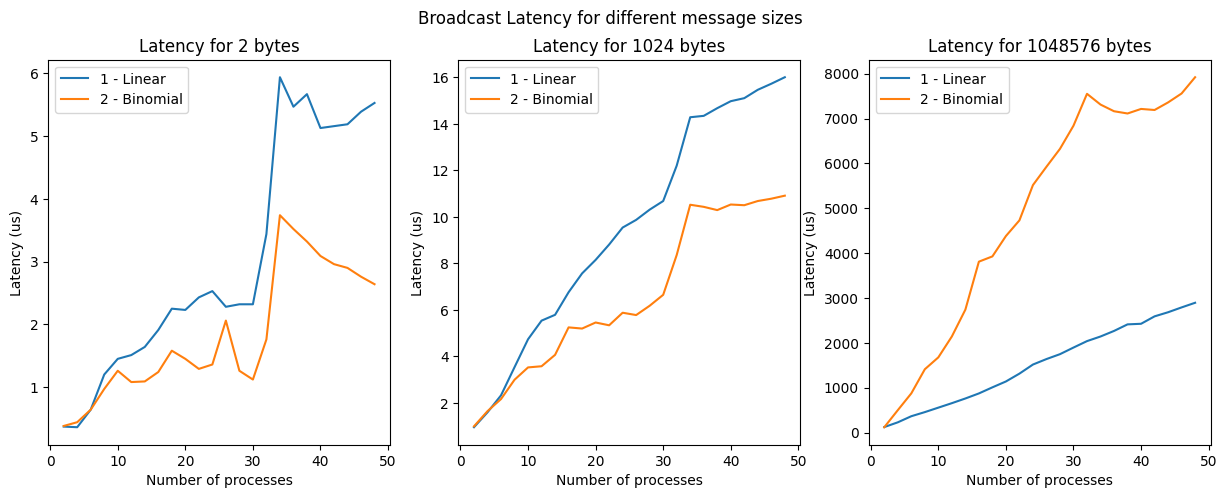

In [20]:
algorithms = {
    1: 'Linear',
    2: 'Binomial'
}
sizes = (2, 1024, 1024*1024)

fig, ax = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle('Broadcast Latency for different message sizes')

x = np.array([ dh.n_proc for dh in latencies if dh.algorithm == 1 ]).flatten()
for i,size in enumerate(sizes):
    y = []
    for algorithm in algorithms.keys():
        y_alg = np.array([ dh.time(size) for dh in latencies if dh.algorithm == algorithm ]).flatten()
        print(f'{algorithm} - {y_alg}')
        ax[i].plot(x, y_alg, label=f'{algorithm} - {algorithms[algorithm]}')
    ax[i].set_title(f'Latency for {size} bytes')
    ax[i].set_xlabel('Number of processes')
    ax[i].set_ylabel('Latency (us)')
    ax[i].legend()
    